In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('smtph_total.csv')
df.head(5)

In [4]:
posts = df['Title'] + ['Description']
type(posts)

pandas.core.series.Series

In [5]:
posts.max(), posts.min()

('휴대폰 스마트폰클리너 필터온 일회용 멀티클리너Description',
 '&lt;집에서 찍는 스마트폰 제품사진&gt; 출간!Description')

In [ ]:
!python3 -m pip install konlpy


In [9]:
from konlpy.tag import Okt
tagger = Okt()

In [12]:
stop_words = ['강,', '글,', '애', '미', '번', '은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹', '때', '만', '원', '이때', '개']

In [17]:
posts_noun = []
for post in posts:
  # print(tagger.nouns(post))
  for noun in tagger.nouns(post):
    posts_noun.append(noun)

len(posts_noun)

6083

In [14]:
from collections import Counter

In [ ]:
noun_counter = Counter(posts_noun)
noun_counter, type(noun_counter)

In [ ]:
top_30_nouns = noun_counter.most_common(30) # 상위 30개만 추출
type(top_30_nouns), top_30_nouns

In [ ]:
top_mouns_dict = dict(top_30_nouns)  # dict형으로 type 변경
top_mouns_dict, type(top_mouns_dict)

In [23]:
from wordcloud import WordCloud

In [25]:
nouns_wordcloud = WordCloud()

In [26]:
nouns_wordcloud.generate_from_frequencies(top_mouns_dict)

In [30]:
import matplotlib.pyplot as plt

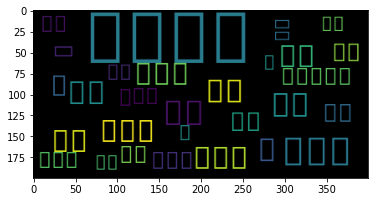

In [31]:
plt.imshow(nouns_wordcloud)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]


In [35]:
countvectorizer = CountVectorizer()
countvectorizer.fit_transform(corpus).toarray()

array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0]])

In [37]:
countvectorizer.vocabulary_

{'do': 0,
 'know': 1,
 'like': 2,
 'love': 3,
 'should': 4,
 'want': 5,
 'what': 6,
 'you': 7,
 'your': 8}

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(corpus).toarray() # 문장을 대표하는 단어

array([[0.        , 0.46735098, 0.        , 0.46735098, 0.        ,
        0.46735098, 0.        , 0.35543247, 0.46735098],
       [0.        , 0.        , 0.79596054, 0.        , 0.        ,
        0.        , 0.        , 0.60534851, 0.        ],
       [0.57735027, 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.57735027, 0.        , 0.        ]])

In [41]:
tfidf.vocabulary_

{'do': 0,
 'know': 1,
 'like': 2,
 'love': 3,
 'should': 4,
 'want': 5,
 'what': 6,
 'you': 7,
 'your': 8}

## 유사한 영화 추천

## Recommand Movie with cos simularity
<br>dataset from https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7?select=movies_metadata.csv

In [ ]:
import pandas as pd
df_data = pd.read_csv('movies_metadata.csv')
df_data.head(3)

In [45]:
df_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [46]:
data = df_data.head(10000)  # 10000개 데이터만 추출

In [47]:
data = data.dropna()  # N/A 삭제

In [ ]:
data.info()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer() # 초기화
tfidf_matrix = tfidf.fit_transform(data['overview'])
tfidf_matrix.shape

(158, 2696)

In [52]:
len(tfidf.vocabulary_)

2696

In [53]:
tfidf_matrix[4].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [54]:
from sklearn.metrics.pairwise import linear_kernel

In [55]:
cosin_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
type(cosin_sim), cosin_sim.shape

(numpy.ndarray, (158, 158))

In [ ]:
cosin_sim[3]

In [59]:
indeces = pd.Series(data.index, index=data['title']).drop_duplicates()
indeces.head(5)

title
GoldenEye                                    9
Friday                                      68
From Dusk Till Dawn                         69
Blue in the Face                           153
Mighty Morphin Power Rangers: The Movie    178
dtype: int64

In [61]:
indeces['From Dusk Till Dawn']

69

In [64]:
sorted(list(cosin_sim[69]), reverse=True)[1:11] # 69번 'From Dusk Till Dawn' 각각의 영화의 유사도

[0.15998660887787308,
 0.14772757089625846,
 0.13396597843861469,
 0.12763954217361856,
 0.12396013932603699,
 0.1189225068324697,
 0.11846245157106666,
 0.11163546861489206,
 0.10414294242114651,
 0.1021239662265584]

In [65]:
cosin_list = list(enumerate(cosin_sim[69])) # 앞의 숫자 만들기
cosin_list

[(0, 0.0727441763199051),
 (1, 0.02892051203972273),
 (2, 0.02996503077446317),
 (3, 0.037174758464543475),
 (4, 0.02346836061741026),
 (5, 0.021246298385504493),
 (6, 0.03633447712794377),
 (7, 0.02409510202753557),
 (8, 0.06229400104850713),
 (9, 0.03702937763287602),
 (10, 0.02266926258350839),
 (11, 0.03550986180781372),
 (12, 0.04067791017893172),
 (13, 0.02258712427618866),
 (14, 0.055681642758578426),
 (15, 0.03285809837552814),
 (16, 0.008864996791036644),
 (17, 0.051654345203359445),
 (18, 0.036543295302026296),
 (19, 0.05436611020060969),
 (20, 0.033444124944652376),
 (21, 0.034369941078449484),
 (22, 0.015738855191422714),
 (23, 0.04867096565015526),
 (24, 0.0165640075249569),
 (25, 0.045349328897193536),
 (26, 0.046479507343680074),
 (27, 0.02335116601519331),
 (28, 0.03414460067128391),
 (29, 0.01880098894929399),
 (30, 0.03749684968923591),
 (31, 0.03495873912734175),
 (32, 0.028904142549040543),
 (33, 0.07653702067400137),
 (34, 0.0420053856954951),
 (35, 0.0188741785850

In [68]:
cosin_index = sorted(cosin_list, key=lambda x:x[1], reverse=True)
cosin_index[1:11]

[(83, 0.15998660887787308),
 (67, 0.14772757089625846),
 (137, 0.13396597843861469),
 (138, 0.12763954217361856),
 (56, 0.12396013932603699),
 (133, 0.1189225068324697),
 (71, 0.11846245157106666),
 (74, 0.11163546861489206),
 (85, 0.10414294242114651),
 (62, 0.1021239662265584)]

In [69]:
[i[0] for i in cosin_index[1:11]]

[83, 67, 137, 138, 56, 133, 71, 74, 85, 62]

In [70]:
movie_indices = [i[0] for i in cosin_index[1:11]]

In [72]:
data['title'].iloc[movie_indices]

3513                      The Spy Who Loved Me
2832                     From Russia with Love
7329                       You Only Live Twice
7330                                 Octopussy
2263                          A View to a Kill
7192    Agent Cody Banks 2: Destination London
2875                          Live and Let Die
2965                   The World Is Not Enough
3517               The Man with the Golden Gun
2572                                    Tarzan
Name: title, dtype: object